# Necessary imports

You should not import anything else in order to complete exercises in this notebook.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

Sample FIR that will be used in first part of this notebook. DO NOT CHANGE ANY OF THE COEFFICIENTS!

In [29]:
example_FIR = np.array([ 0.01097947, -0.01154252, -0.01216644,  0.01286166,  0.01364116,
       -0.01452123, -0.0155227 ,  0.01667252,  0.01800633, -0.01957209,
       -0.0214361 ,  0.02369253,  0.02647989, -0.03001054, -0.03462755,
        0.04092347,  0.05001757, -0.06430831, -0.09003163,  0.15005272,
        0.45015816,  0.45015816,  0.15005272, -0.09003163, -0.06430831,
        0.05001757,  0.04092347, -0.03462755, -0.03001054,  0.02647989,
        0.02369253, -0.0214361 , -0.01957209,  0.01800633,  0.01667252,
       -0.0155227 , -0.01452123,  0.01364116,  0.01286166, -0.01216644,
       -0.01154252])

## Usefull functions
Feel free to use these functions, they can come in handy.

np.fft.fft(); np.convolve(); np.angle(); np.abs(); 


# Practical problem set

## Frequency amplitude and phase characteristics

### Exercise
Draw frequency [amplitude](https://en.wikipedia.org/wiki/Frequency_response) and [phase](https://en.wikipedia.org/wiki/Phase_response) responses of the filter with coefficients contained in example_FIR. FFT should be calculated at least in 512 points. Answer the questions.

Text(0.5, 1.0, 'Faza')

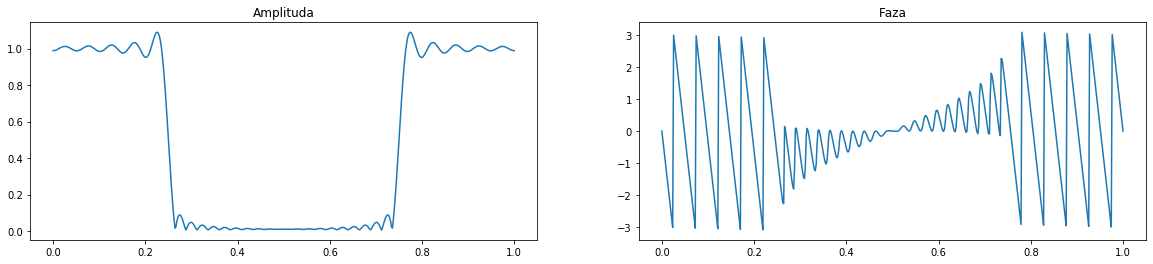

In [30]:
########## Your code goes here ##########

H = np.zeros(512,dtype = complex)
N = example_FIR.size
fn = np.linspace(0,1,len(H))
z = np.exp(2j*np.pi*fn)
for m in range(len(H)):
    for n in range(N):
        H[m] = H[m] + example_FIR[n] * z[m] ** (-n)
amplitude = np.abs(H)
phase = np.angle(H)
fig, axes = plt.subplots(1, 2, figsize=(20,4))
axes[0].plot(fn, amplitude)
axes[0].set_title('Amplituda')
axes[1].plot(fn, phase)
axes[1].set_title('Faza')

### Questions
- Based on the graphs above, answer what type of filter it is (low-pass, high-pass, band-pass, band-stop) and what is its the cutoff frequency.
- Is phase of this filter linear? Why?
- What are the requirements when designing a filter, to achieve linear phase.

hint: $\pi$ and $-\pi$ means the same phase

########## Your answers goes here ##########To jest filtr dolnoprzepustowy.Fg = 1/4 fs.Mamy tutaj do czynienia z liniową fazą w paśmie przepustowym(na liniową charakterystykę fazową ma wpływ sytuacja gdy współczynniki są symetryczne).


## FIR filter design using window method

### Exercise 

Implement a function that will design low-pass FIR filter using window method.
The algorithm consists of the following steps:

- Selection of the cutoff frequency. 
- Selection of the window function. 
- Determining the number of filter coefficients. 
- Calculation of the ideal filter according to the formula: 
$$ \large
h(n) = 2 f_{c} \; \frac{sin(2 \pi n f_{c})}{2 \pi n f_{c}}
$$ where:
    - n is vector of consecutive numbers of the filter coefficients from -N/2 to N/2,
    - fc is normalized cutoff frequency from 0 to 1. 
- Multiplying sinc function with the selected window.

In [31]:
def lp_design_window(fc, N, window):  
    """
    This function should design low-pass filter using algorithm presented above.
   
    Parameters
    ----------
    fc: Int containing cutoff frequency of filter.
    N: Int containing number of filter coefficients.
    window: Numpy array of shape (N, ) containing window function.
    
    Returns
    -------
    h: numpy array of shape (N, ) containing coefficients of filter (impulse response)

    """
    
    ########## Your code goes here ##########
    
    n = np.arange(-N/2, N/2, 1)
    H = 2 * fc * np.sin(2* np.pi * n * fc)/(2 * np.pi * n * fc)
    h = H * window
    
    return h

Verify your solution. If spectrum of signal that is filtered using your implementation (on the third graph) is attenuated above 25 Hz similarly to the singal presented on second chart, filter is designed correctly. Check if your implementation works for different cutoff frequencies.

In [32]:
fc = 0.25               # Normalized cutoff frequency 
N = 41                  # Number of coefficients
window = np.ones((N))   # Rectangular window

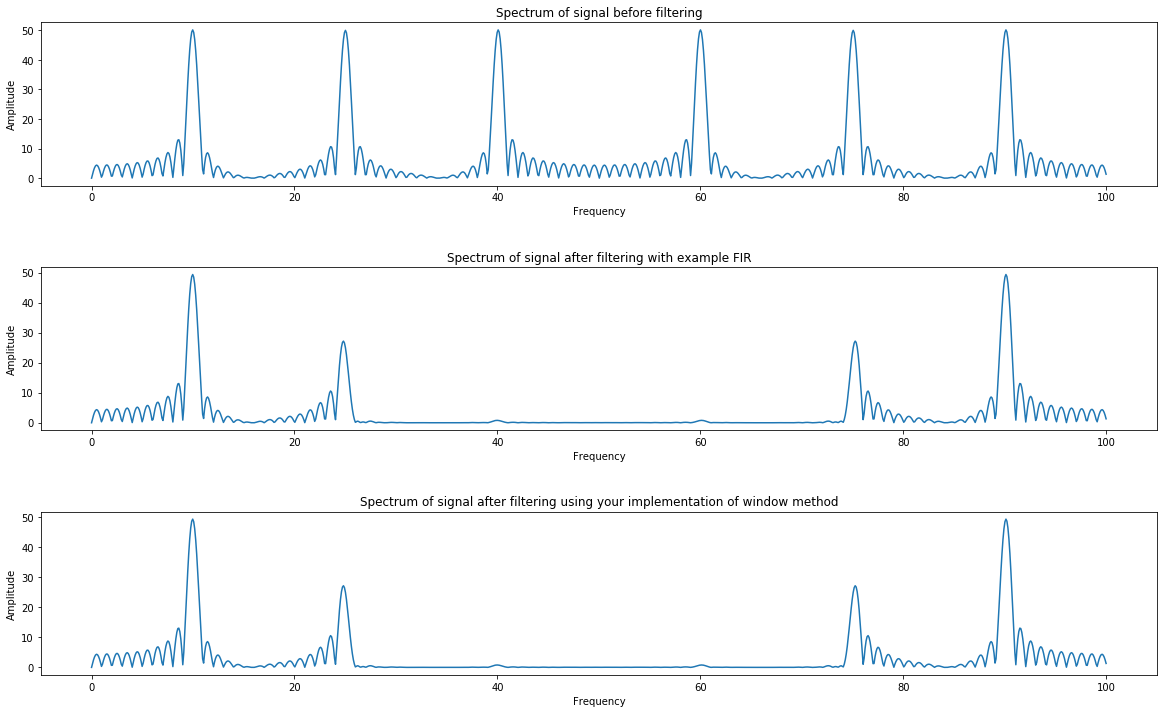

In [33]:
fs = 100  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate signal
signal = np.sin(2*np.pi*t*10) + np.sin(2*np.pi*t*25) + np.sin(2*np.pi*t*40)

# Generate FIR coefficients
lp_filter = lp_design_window(fc, N, window)

# Reference filtering
filtered_ref = np.convolve(signal, example_FIR)

# Signal filtering
filtered = np.convolve(signal, lp_filter)

plt.figure(figsize = (20, 12))
plt.subplot(3,1,1)
plt.plot(np.linspace(0,fs,1024), np.abs(np.fft.fft(signal,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spectrum of signal before filtering')

plt.subplot(3,1,2)
plt.plot(np.linspace(0,fs,1024), np.abs(np.fft.fft(filtered_ref,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spectrum of signal after filtering with example FIR')

plt.subplot(3,1,3)
plt.plot(np.linspace(0,fs,1024), np.abs(np.fft.fft(filtered,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spectrum of signal after filtering using your implementation of window method')

plt.subplots_adjust(hspace = 0.5)
plt.show()

## Different windows and number of coefficients

### Exercise

Using your implementation design filters with three different window function ([rectangular](https://pl.wikipedia.org/wiki/Okno_czasowe#Okno_prostok%C4%85tne), [hanning](https://pl.wikipedia.org/wiki/Okno_czasowe#Okno_Hanna_(Hanninga)) and [hamming](https://pl.wikipedia.org/wiki/Okno_czasowe#Okno_Hamminga)). For each of these filters use 11, 51 and 151 coefficients. Plot frequency amplitude responses of these filters and answer the questions. Pay attention primarily to [transition band](https://en.wikipedia.org/wiki/Transition_band), [passband ripple](https://en.wikipedia.org/wiki/Filter_(signal_processing)#The_transfer_function), width of the mainlobe and strenght of the damping.

<function matplotlib.pyplot.show(*args, **kw)>

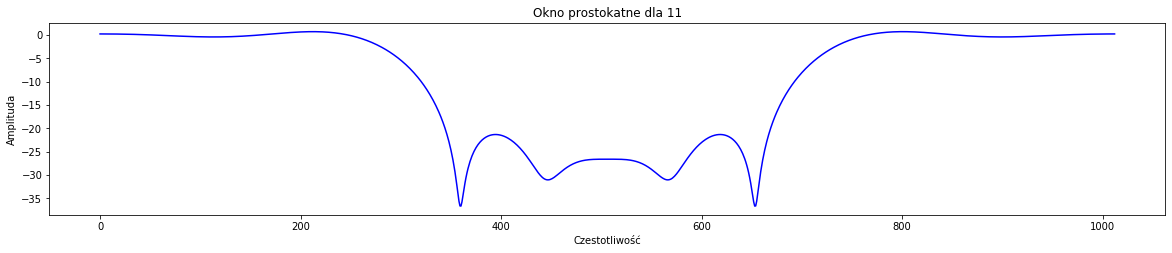

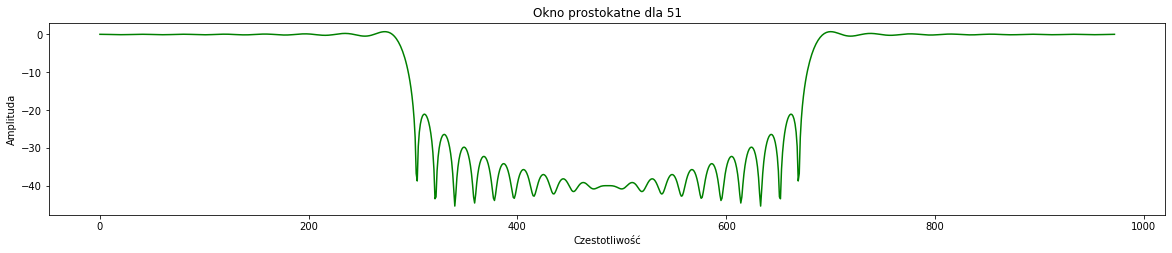

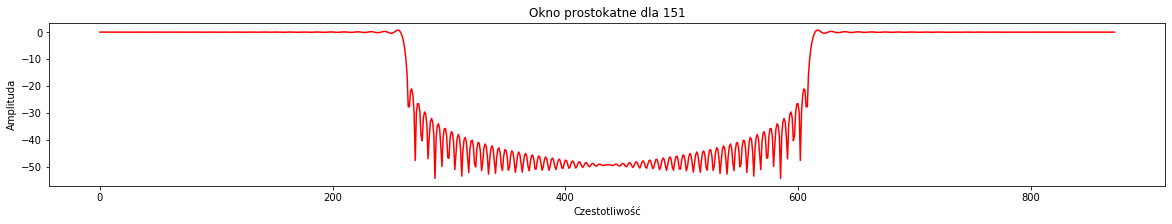

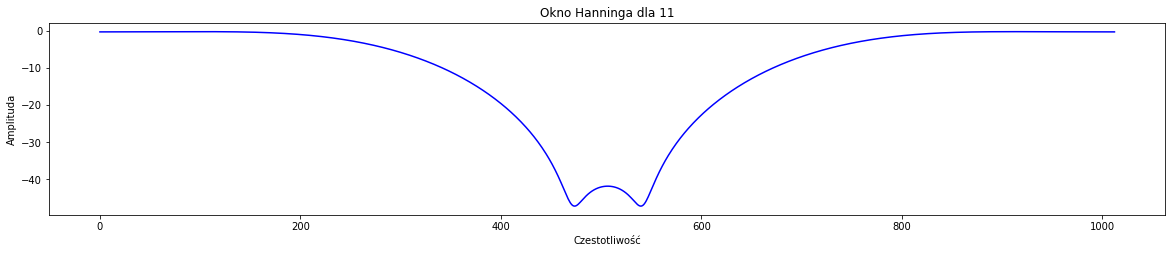

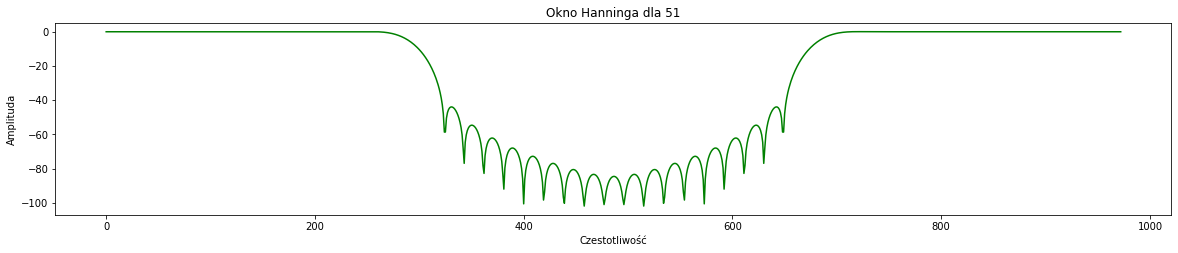

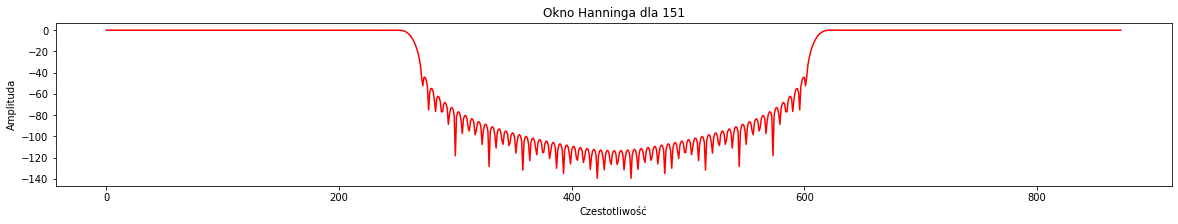

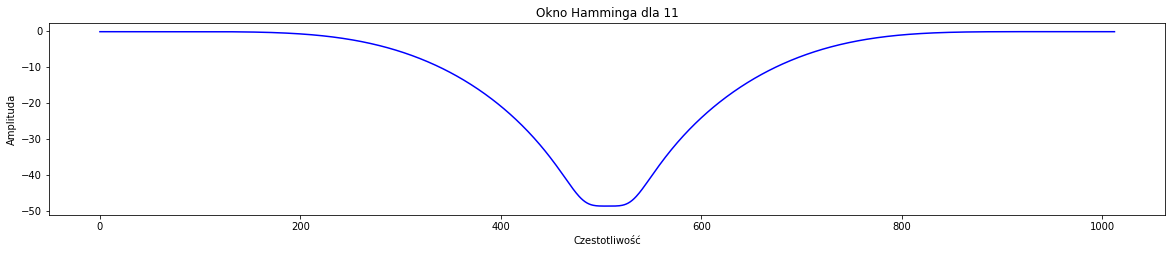

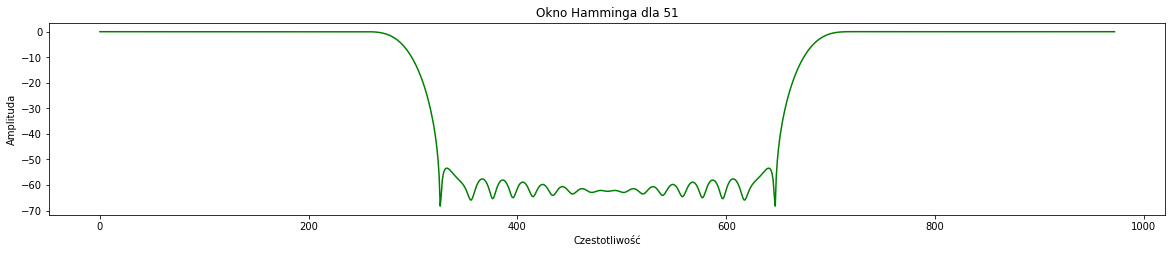

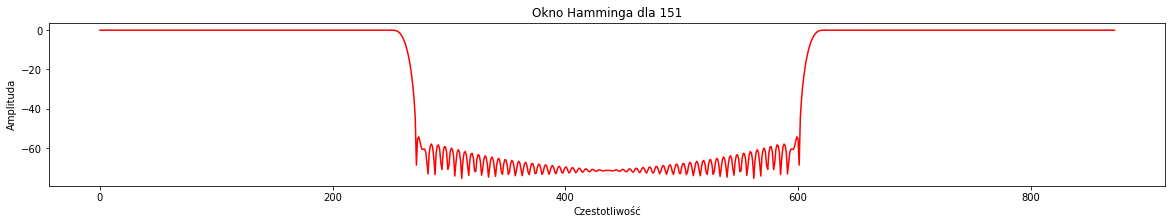

In [34]:
########## Your code goes here ##########

fc = 0.7
def amplitude(h):
    H = np.zeros(1024 - np.size(h))
    H[0:np.size(h):1] = h
    H = np.fft.fft(H)
    A = np.abs(H)
    return A

rectangle1 = 11
rectangle_window1 = np.ones(rectangle1)
hr1 = lp_design_window(fc, N = rectangle1, window = rectangle_window1)

rectangle2 = 51
rectangle_window2 = np.ones(rectangle2)
hr2 = lp_design_window(fc, N = rectangle2, window = rectangle_window2)

rectangle3 = 151
rectangle_window3 = np.ones(rectangle3)
hr3 = lp_design_window(fc, N = rectangle3, window = rectangle_window3)

plt.figure(figsize = (20,12))
plt.subplot(3,1,1)
plt.plot(20* np.log10(amplitude(hr1)), 'b-')
plt.xlabel('Czestotliwość')
plt.ylabel('Amplituda')
plt.title('Okno prostokatne dla 11')

plt.figure(figsize = (20,12))
plt.subplot(3,1,2)
plt.plot(20* np.log10(amplitude(hr2)), 'g-')
plt.xlabel('Czestotliwość')
plt.ylabel('Amplituda')
plt.title('Okno prostokatne dla 51')

plt.figure(figsize = (20,12))
plt.subplot(3,1,3)
plt.plot(20* np.log10(amplitude(hr3)), 'r-')
plt.xlabel('Czestotliwość')
plt.ylabel('Amplituda')
plt.title('Okno prostokatne dla 151')

plt.subplots_adjust(hspace = 0.5)
plt.show

hanning1 = 11
hanning_window1 = np.hanning(hanning1)
hhan1 = lp_design_window(fc, N = hanning1, window = hanning_window1)

hanning2 = 51
hanning_window2 = np.hanning(hanning2)
hhan2 = lp_design_window(fc, N = hanning2, window = hanning_window2)

hanning3 = 151
hanning_window3 = np.hanning(hanning3)
hhan3 = lp_design_window(fc, N = hanning3, window = hanning_window3)

plt.figure(figsize = (20,12))
plt.subplot(3,1,1)
plt.plot(20* np.log10(amplitude(hhan1)), 'b-')
plt.xlabel('Czestotliwość')
plt.ylabel('Amplituda')
plt.title('Okno Hanninga dla 11')

plt.figure(figsize = (20,12))
plt.subplot(3,1,2)
plt.plot(20* np.log10(amplitude(hhan2)), 'g-')
plt.xlabel('Czestotliwość')
plt.ylabel('Amplituda')
plt.title('Okno Hanninga dla 51')

plt.figure(figsize = (20,12))
plt.subplot(3,1,3)
plt.plot(20* np.log10(amplitude(hhan3)), 'r-')
plt.xlabel('Czestotliwość')
plt.ylabel('Amplituda')
plt.title('Okno Hanninga dla 151')

plt.subplots_adjust(hspace = 0.5)
plt.show

hamming1 = 11
hamming_window1 = np.hamming(hamming1)
hham1 = lp_design_window(fc, N = hamming1, window = hamming_window1)

hamming2 = 51
hamming_window2 = np.hamming(hamming2)
hham2 = lp_design_window(fc, N = hamming2, window = hamming_window2)

hamming3 = 151
hamming_window3 = np.hamming(hamming3)
hham3 = lp_design_window(fc, N = hamming3, window = hamming_window3)

plt.figure(figsize = (20,12))
plt.subplot(3,1,1)
plt.plot(20* np.log10(amplitude(hham1)), 'b-')
plt.xlabel('Czestotliwość')
plt.ylabel('Amplituda')
plt.title('Okno Hamminga dla 11')

plt.figure(figsize = (20,12))
plt.subplot(3,1,2)
plt.plot(20* np.log10(amplitude(hham2)), 'g-')
plt.xlabel('Czestotliwość')
plt.ylabel('Amplituda')
plt.title('Okno Hamminga dla 51')

plt.figure(figsize = (20,12))
plt.subplot(3,1,3)
plt.plot(20* np.log10(amplitude(hham3)), 'r-')
plt.xlabel('Czestotliwość')
plt.ylabel('Amplituda')
plt.title('Okno Hamminga dla 151')

plt.subplots_adjust(hspace = 0.5)
plt.show

### Question 

- What are the differences when the window is changed?
- What are the differences when the number of coefficients is changed?
- What is the tradeoff between different windows?

########## Your answers goes here ##########Okno prostokątne ma węższe pasmo przejsciowe ale gorzej tłumi.W pozostałych jest odwrotna sytuacja.

## FIR filter design using frequency sampling method

### Exercise

Implement a function that will design a FIR filter with a given characteristic using frequency sampling method.
The algorithm consists of the following steps:

- Selection of the cutoff frequency 
- Determining the number of filter coefficients 
- Determining desired frequency response
- Sampling frequency response
- Performing IFFT
- Shifting coefficients
- Removal of unsymmetrical value

In [35]:
def lp_design_fs(H):
    """
    This function should design FIR filter using algorithm presented above.
    Hint: What are the requirements to get a real signal from idft?
    Parameters
    ----------
    H: Numpy array containing half of the filter frequency response.
    
    Returns
    -------
    h: numpy array containing coefficients of filter (impulse response).

    """
    
    ########## Your code goes here ##########
    
    F = np.flip(np.conj(H))
    H = np.concatenate((H,F))
    h = np.real(np.fft.ifft(H))
    M = len(h)//2 - 1
    h1 = np.array([h[0]])
    h2 = np.flip(h[1:len(h)])
    h = np.concatenate((h1,h2))
    h = np.roll(h,M)
    
    return h

Verify you implementation. 

In [36]:
H = np.array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])       # Half of the frequency amplitude response

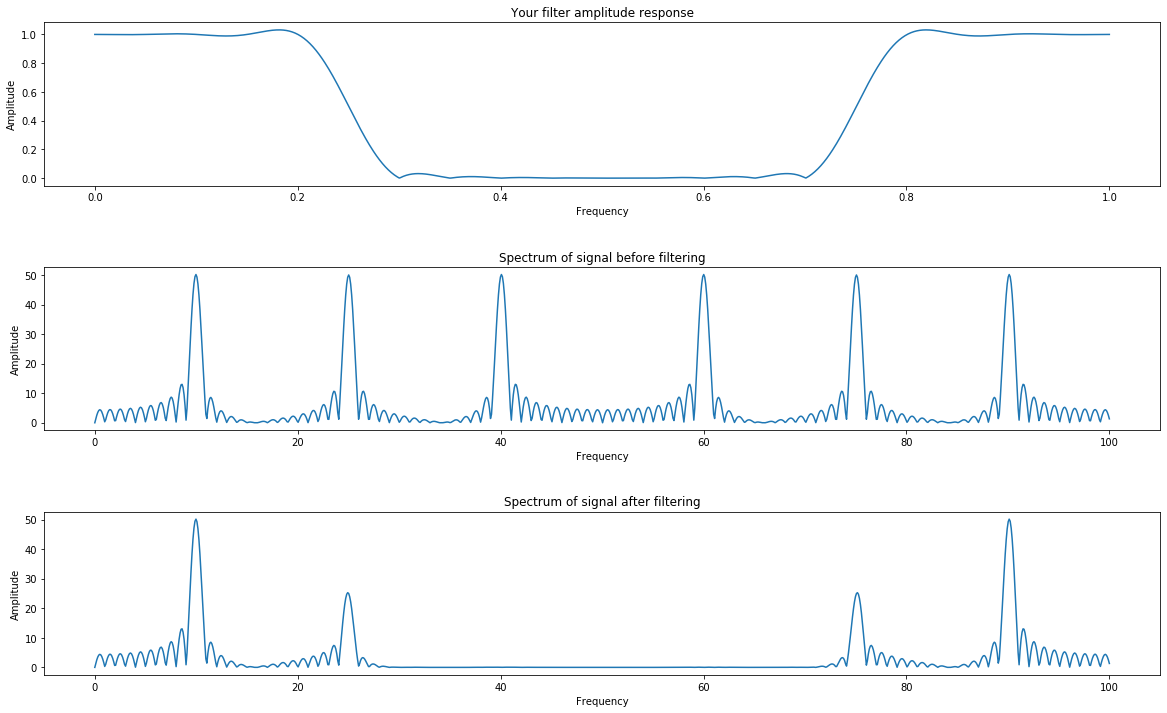

In [37]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate signal
signal = np.sin(2*np.pi*t*10) + np.sin(2*np.pi*t*25) + np.sin(2*np.pi*t*40)

# Generate FIR coefficients
lp_filter = lp_design_fs(H)

# Signal filtering
filtered = np.convolve(signal, lp_filter)

plt.figure(figsize = (20, 12))
plt.subplot(3,1,1)
plt.plot(np.linspace(0,1,1024), np.abs(np.fft.fft(lp_filter,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Your filter amplitude response')

plt.subplot(3,1,2)
plt.plot(np.linspace(0,fs,1024), np.abs(np.fft.fft(signal,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spectrum of signal before filtering')

plt.subplot(3,1,3)
plt.plot(np.linspace(0,fs,1024), np.abs(np.fft.fft(filtered,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spectrum of signal after filtering')

plt.subplots_adjust(hspace = 0.5)
plt.show()

### Optional exercise
Try to design frequency response above (H) to minimize impact of ripples without changing the number of coefficients.

hint: What is the tradeoff between transition band width and ripples?

## Transitions between filter types

You can easily calculate coefficients of high-pass filter using the relationship between the low-pass and high-pass filters:

$$\large
h_{hp}[n] = \delta(n) - h_{lp}[n] \quad \quad, \small n = -\frac{N-1}{2},...,0,...,\frac{N-1}{2}$$

You can also use fast trick to switch form low-pass to high-pass filter:

$$\large
h_{hp}[n] = (-1)^{n}h_{lp}[n] \quad \quad,  \small n = 0,1,...,N $$

hint: Using the second method straight forward will shift your cutoff frequency by 0.5.

### Exercise
Implement a function that will design the high-pass filter with a given cutoff frequency and number of coefficients using window method. You should use previously implemented functions.

In [38]:
def hp_design(fc, N, window):
    """
    This function should design high-pass filter using low-pass filter.
   
    Parameters
    ----------
    fc: Int containing cutoff frequency of filter.
    N: Int containing number of filter coefficients.
    window: numpy array of shape (N, ) containing window function.
    
    Returns
    -------
    h: Numpy array of shape (N, ) containing coefficients of filter (impulse response)

    """
    
    ########## Your code goes here ##########
    
    fc = fc - 0.5
    h = lp_design_window(fc, N, window)
    for n in range(N):
        h[n] = h[n] * (-1) ** (-n)
    return h

Verify your implementation. If filtered signal is attenuated below 25 Hz filter is designed correctly. Check if it works for different cutoff frequencies.

In [39]:
fc = 0.25               # Normalized frequency cutoff
N = 41                  # Number of coefficients
window = np.ones((N))   # Rectangular window

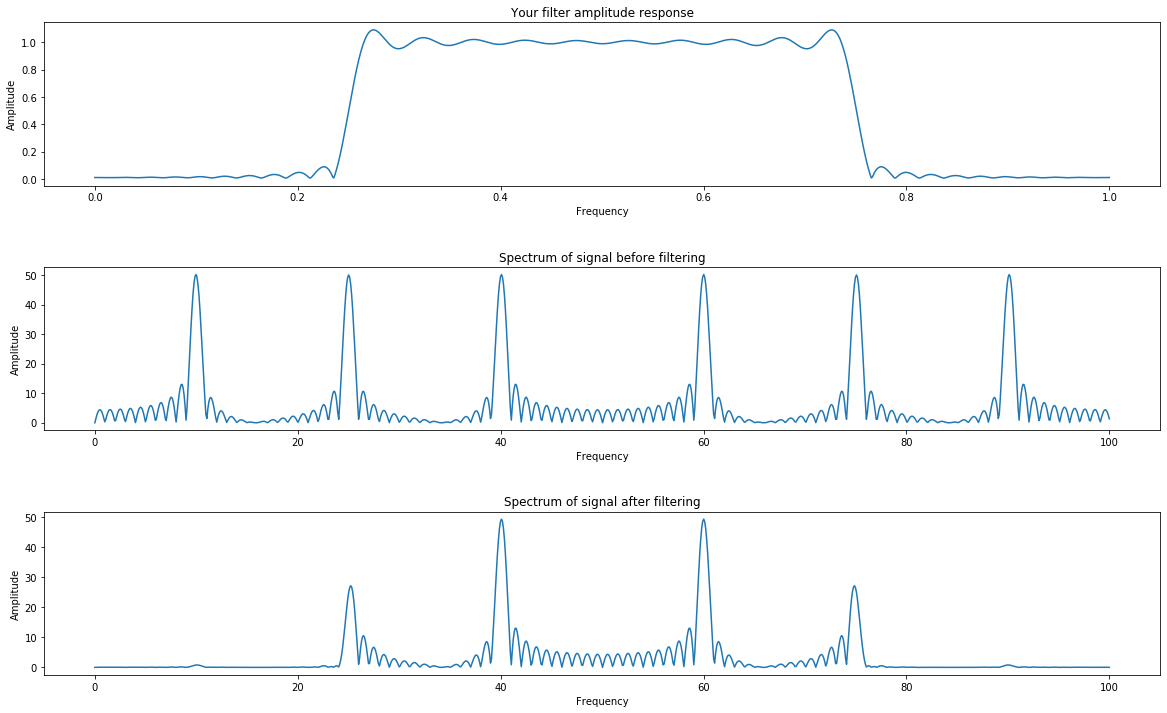

In [40]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate signal
signal = np.sin(2*np.pi*t*10) + np.sin(2*np.pi*t*25) + np.sin(2*np.pi*t*40)

# Generate FIR coefficients
lp_filter = hp_design(fc,N, window)

# Signal filtering
filtered = np.convolve(signal, lp_filter)

plt.figure(figsize = (20,12))
plt.subplot(3,1,1)
plt.plot(np.linspace(0,1,1024), np.abs(np.fft.fft(lp_filter,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Your filter amplitude response')

plt.subplot(3,1,2)
plt.plot(np.linspace(0,fs,1024), np.abs(np.fft.fft(signal,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spectrum of signal before filtering')

plt.subplot(3,1,3)
plt.plot(np.linspace(0,fs,1024), np.abs(np.fft.fft(filtered,1024)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spectrum of signal after filtering')

plt.subplots_adjust(hspace = 0.5)
plt.show()

## Band-pass filters

The final task is to implement the function that will filter signal with [band-pass](https://en.wikipedia.org/wiki/Band-pass_filter) filter designed using window method.

In [41]:
def bandpass_filter(signal, fl, fh, N, window):
    """
    This function should filter signal with band-pass filter using low-pass and high-pass filters.
   
    Parameters
    ----------
    signal: numpy array containing signal for filtration.
    fl: Int containing lower cutoff frequency of filter.
    fh: Int containing upper cutoff frequency of filter.
    N: Int containing number of filter coefficients.
    window: numpy array of shape (N, ) containing window function.
    
    Returns
    -------
    X: numpy array containing filtered signal
    
    hint: How to obtain band-pass frequency response using low-pass and high-pass filters?
    """
    
    ########## Your code goes here ##########
    
    hp = hp_design(fl, N, window)
    lp = lp_design_window(fh, N, window)
    X = np.convolve(signal, hp)
    X = np.convolve(X, lp)
    
    return X

Verify your implementation. Check if it works correctly for different bands.

In [42]:
fl = 0.25              # Band start
fh = 0.3               # Band stop
N = 41                 # Number of coefficients
window = np.ones((N))  # Rectangular window

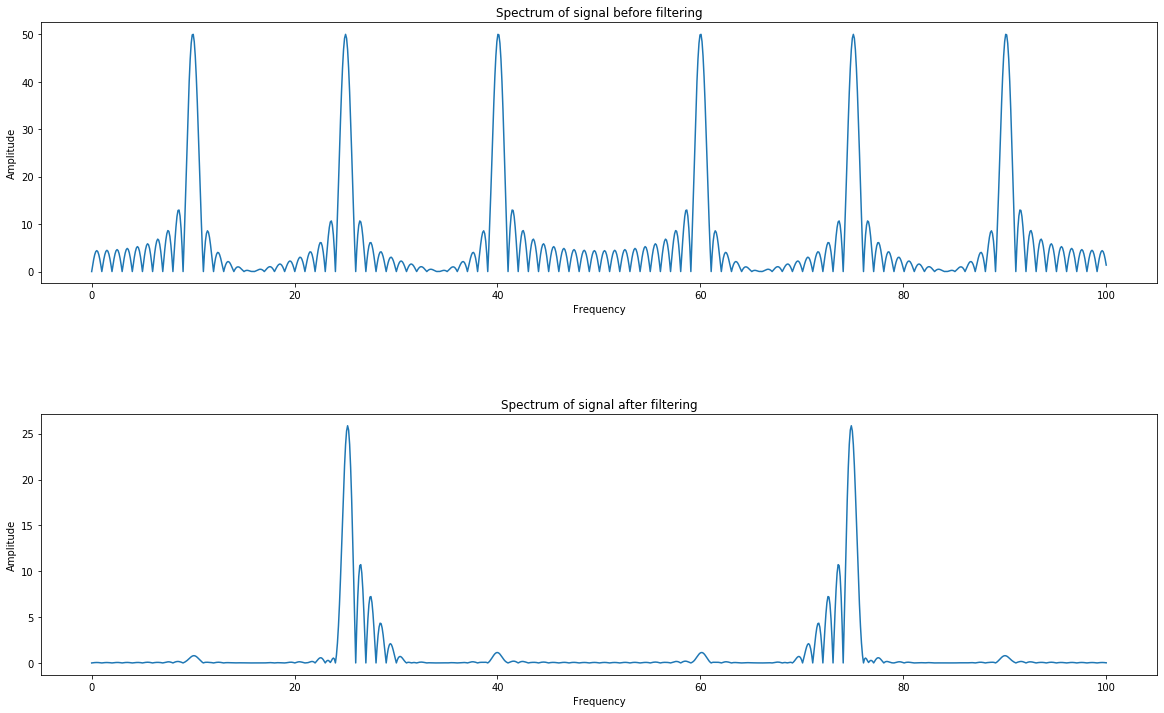

In [43]:
fs = 1e2  # Sampling frequency
dt = 1/fs # Sampling interval
t_s = 0   # Start of sampling 
t_s = 1   # End of sampling 

# Generate timestamps of samples
t = np.arange(0, 1, dt)

# Generate signal
signal = np.sin(2*np.pi*t*10) + np.sin(2*np.pi*t*25) + np.sin(2*np.pi*t*40)

# Filter the signal using your implementation
filtered = bandpass_filter(signal,fl,fh,N,window)

plt.figure(figsize = (20, 12))

plt.subplot(2,1,1)
plt.plot(np.linspace(0,fs,1000), np.abs(np.fft.fft(signal,1000)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spectrum of signal before filtering')

plt.subplot(2,1,2)
plt.plot(np.linspace(0,fs,1000), np.abs(np.fft.fft(filtered,1000)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Spectrum of signal after filtering')

plt.subplots_adjust(hspace = 0.5)
plt.show()